In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/2018TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.40,64.42,62.20,64.11,64.11,21761000
1,2018-01-03,64.20,65.05,63.11,63.45,63.45,22607500
2,2018-01-04,62.57,63.71,61.14,62.92,62.92,49731500
3,2018-01-05,63.32,63.45,62.40,63.32,63.32,22956000
4,2018-01-08,63.20,67.40,63.10,67.28,67.28,49297000


In [3]:
df.shape

(954, 7)

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.40,64.42,62.20,64.11,64.11,21761000
1,2018-01-03,64.20,65.05,63.11,63.45,63.45,22607500
2,2018-01-04,62.57,63.71,61.14,62.92,62.92,49731500
3,2018-01-05,63.32,63.45,62.40,63.32,63.32,22956000
4,2018-01-08,63.20,67.40,63.10,67.28,67.28,49297000


In [7]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
df['Date'].max()-df['Date'].min()

Timedelta('1381 days 00:00:00')

In [9]:
df.iloc[-120:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,120,120,120,120,120,120
mean,683,694,672,683,683,22208745
std,63,62,64,63,63,7591347
min,552,566,546,563,563,9800600
25%,628,644,621,630,630,16299350
50%,680,693,668,679,679,21131600
75%,733,740,720,732,732,26538725
max,815,820,813,818,818,46503900


In [10]:
df.index = df['Date']

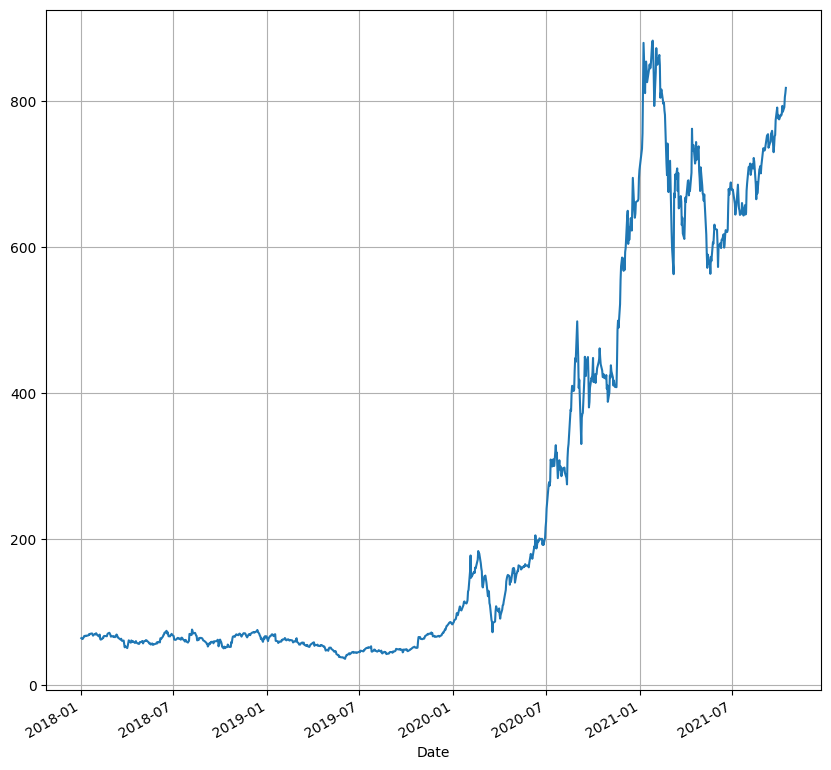

In [14]:
df['Adj Close'].plot(figsize=(10,10),grid='true')
plt.show()

In [15]:
df['Percentage_Change']= df['Adj Close'].pct_change() * 100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percentage_Change
Date,,,,,,,,
2018-01-02,2018-01-02,62.40,64.42,62.20,64.11,64.11,21761000,NaN
2018-01-03,2018-01-03,64.20,65.05,63.11,63.45,63.45,22607500,-1.029481
2018-01-04,2018-01-04,62.57,63.71,61.14,62.92,62.92,49731500,-0.835303
2018-01-05,2018-01-05,63.32,63.45,62.40,63.32,63.32,22956000,0.635728
2018-01-08,2018-01-08,63.20,67.40,63.10,67.28,67.28,49297000,6.253948


In [16]:
df.dropna(axis = 0, inplace = True)

In [17]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Percentage_Change
Date,,,,,,,,
2018-01-03,2018-01-03,64.20,65.05,63.11,63.45,63.45,22607500,-1.029481
2018-01-04,2018-01-04,62.57,63.71,61.14,62.92,62.92,49731500,-0.835303
2018-01-05,2018-01-05,63.32,63.45,62.40,63.32,63.32,22956000,0.635728
2018-01-08,2018-01-08,63.20,67.40,63.10,67.28,67.28,49297000,6.253948
2018-01-09,2018-01-09,67.03,67.76,65.48,66.74,66.74,35733000,-0.802616


<Axes: xlabel='Date'>

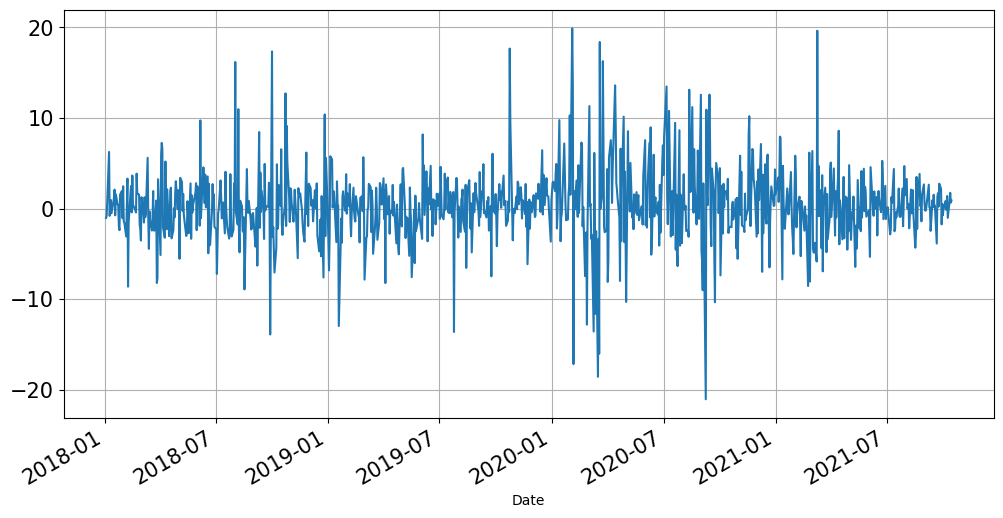

In [21]:
df['Percentage_Change'].plot(figsize=(12,6),grid='true',fontsize=15)

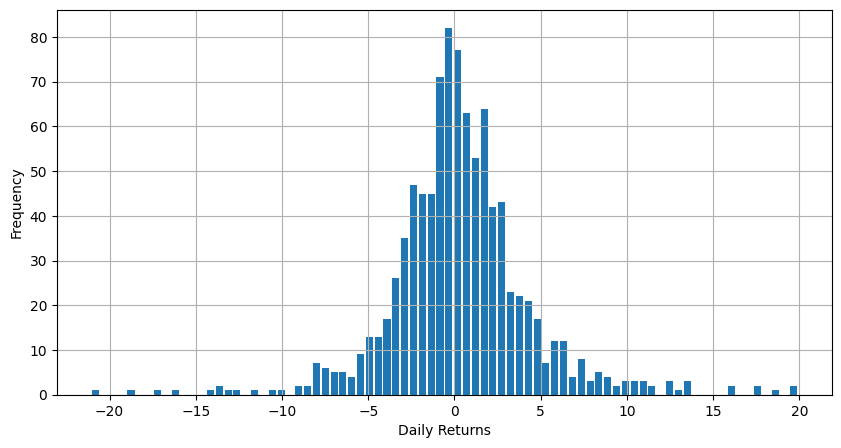

count    953.000000
mean       0.351163
std        4.101373
min      -21.062823
25%       -1.743796
50%        0.180296
75%        2.081806
max       19.898547
Name: Percentage_Change, dtype: float64

In [35]:
df['Percentage_Change'].hist(bins=80,figsize=(10,5),rwidth=0.8)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()
df.Percentage_Change.describe()

In [37]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Percentage_Change'].count())
df['Trend']= df['Percentage_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percentage_Change,Trend
Date,,,,,,,,,
2018-01-03,2018-01-03,64.20,65.05,63.11,63.45,63.45,22607500,-1.029481,Negative
2018-01-04,2018-01-04,62.57,63.71,61.14,62.92,62.92,49731500,-0.835303,Slight Negative
2018-01-05,2018-01-05,63.32,63.45,62.40,63.32,63.32,22956000,0.635728,Slight Positive
2018-01-08,2018-01-08,63.20,67.40,63.10,67.28,67.28,49297000,6.253948,Among top gainers
2018-01-09,2018-01-09,67.03,67.76,65.48,66.74,66.74,35733000,-0.802616,Slight Negative


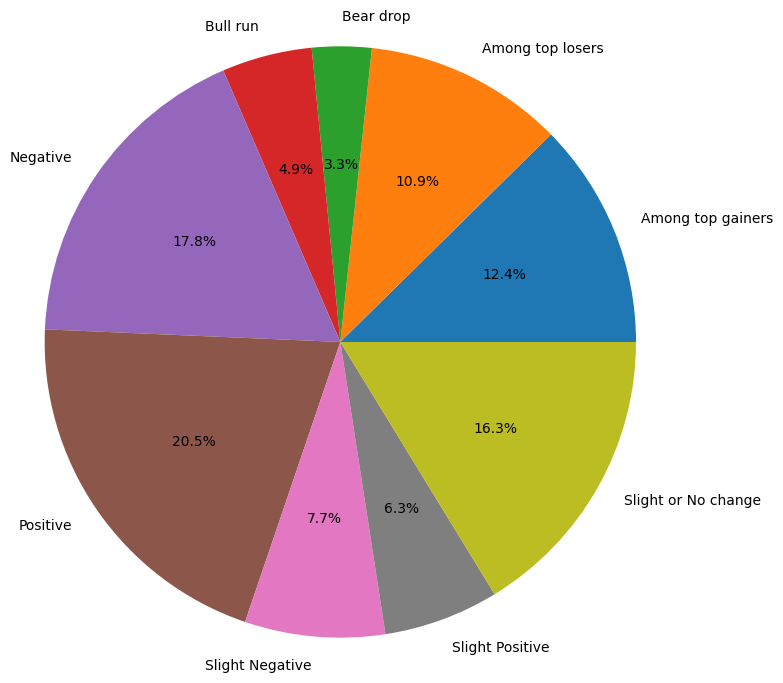

In [38]:
TSLA_pie_data = df.groupby('Trend')
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(TSLA_pie_data['Trend'].count(), labels = pie_label,
        autopct = '%1.1f%%', radius = 2)

plt.show()